In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_disease_prediction.ipynb', 'README.md', 'Untitled.ipynb']


In [75]:
ds = pd.read_csv("heart.csv")


In [76]:
type(ds)


pandas.core.frame.DataFrame

In [77]:
ds.shape


(303, 14)

In [78]:
ds.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [79]:
ds.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


In [80]:
ds.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(ds.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [83]:
ds["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [84]:
ds["target"].unique()


array([1, 0], dtype=int64)

In [85]:
print(ds.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


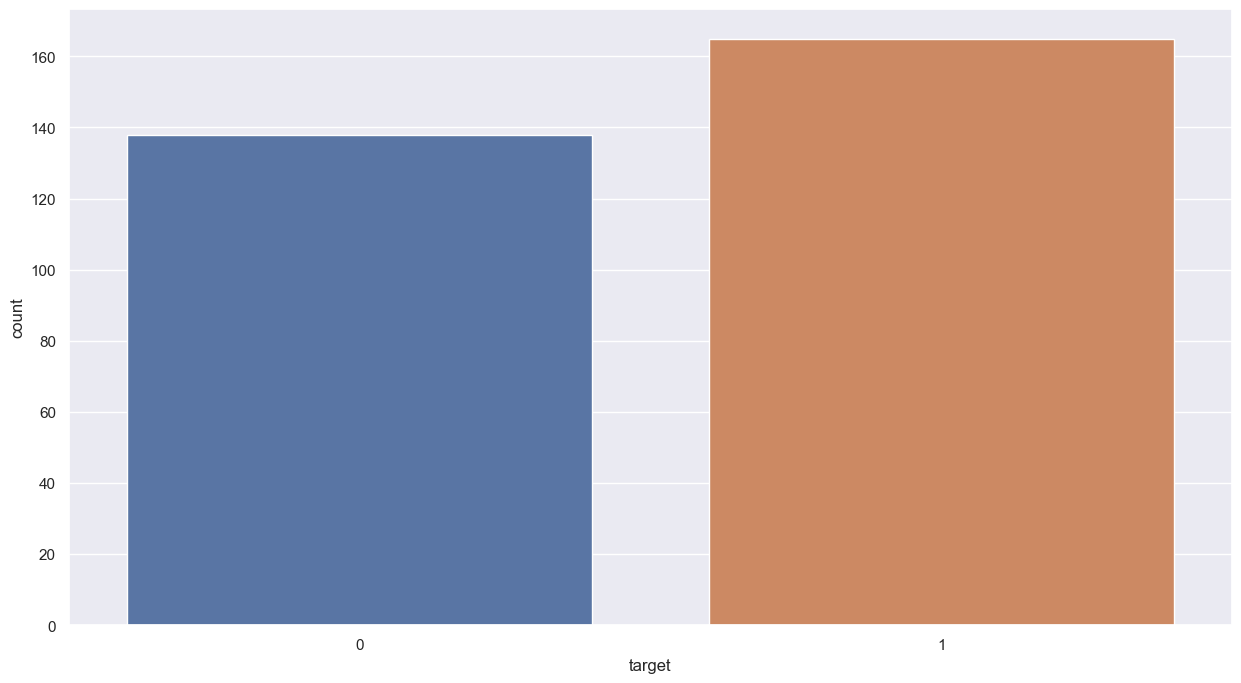

In [86]:
y = dataset["target"]

sns.countplot(y)


target_temp = ds.target.value_counts()

print(target_temp)

In [87]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [88]:
ds["sex"].unique()


array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

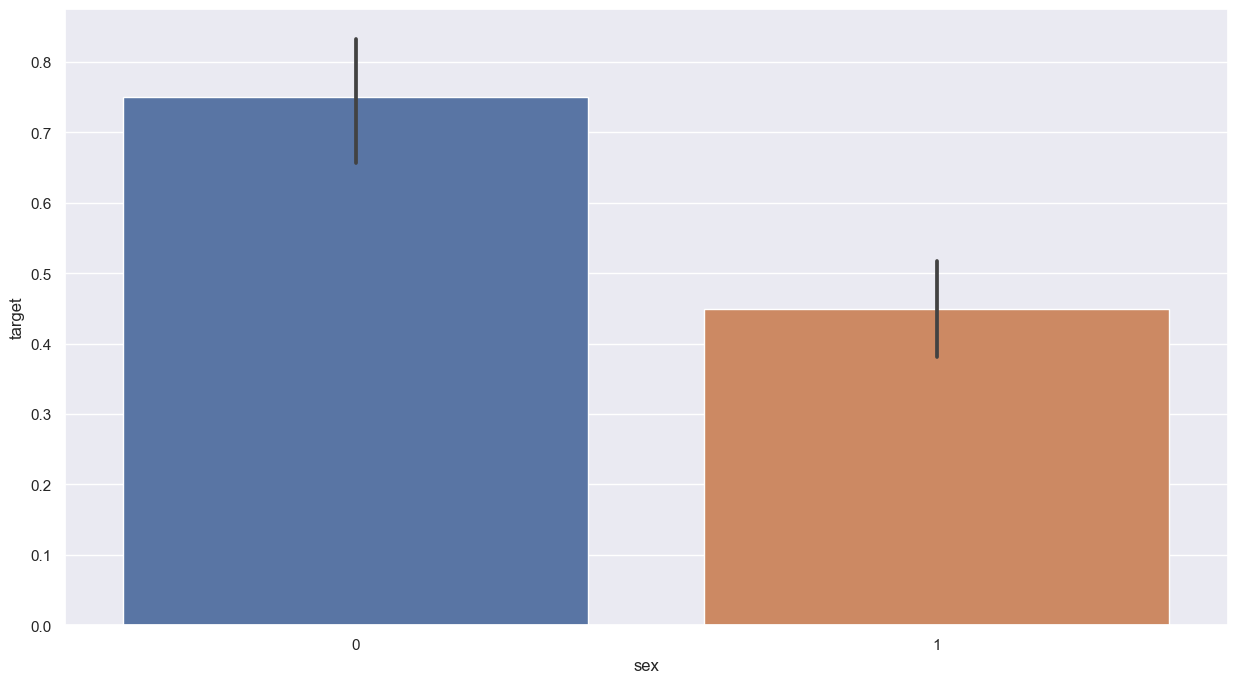

In [89]:
sns.barplot(ds["sex"],y)


In [90]:
ds["c_p"].unique()


KeyError: 'c_p'

In [ ]:
sns.barplot(ds["c_p"],y)


In [ ]:
dataset["fbs"].describe()


In [ ]:
dataset["fbs"].unique()


In [ ]:
sns.barplot(dataset["fbs"],y)


In [ ]:
dataset["restecg"].unique()


In [ ]:
sns.barplot(dataset["restecg"],y)


In [ ]:
dataset["exang"].unique()


In [ ]:
sns.barplot(dataset["exang"],y)


In [ ]:
dataset["slope"].unique()

In [ ]:
sns.barplot(dataset["slope"],y)

In [91]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

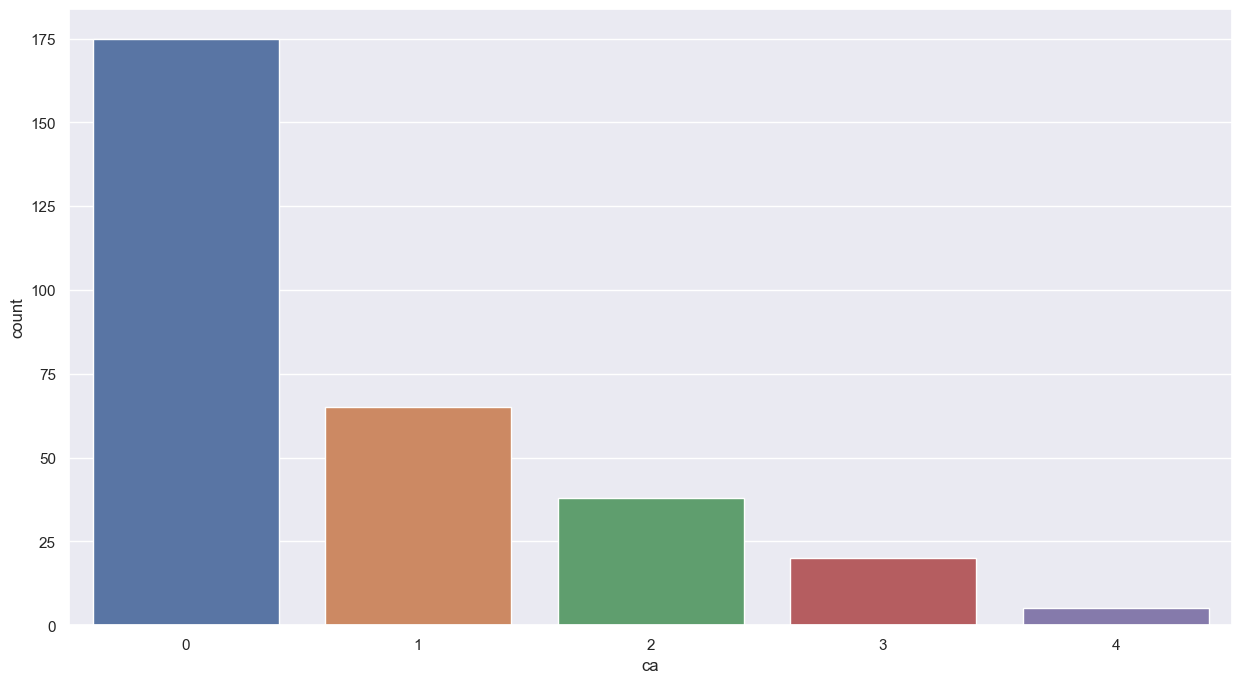

In [92]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

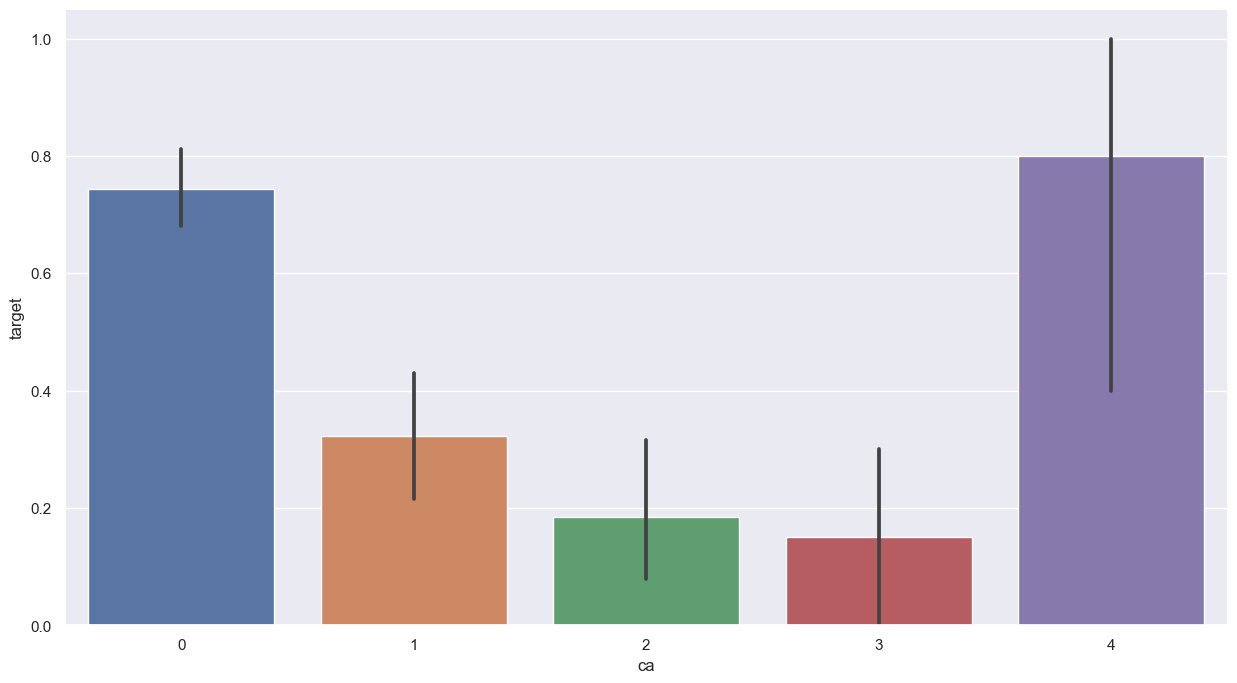

In [93]:
sns.barplot(dataset["ca"],y)

In [94]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

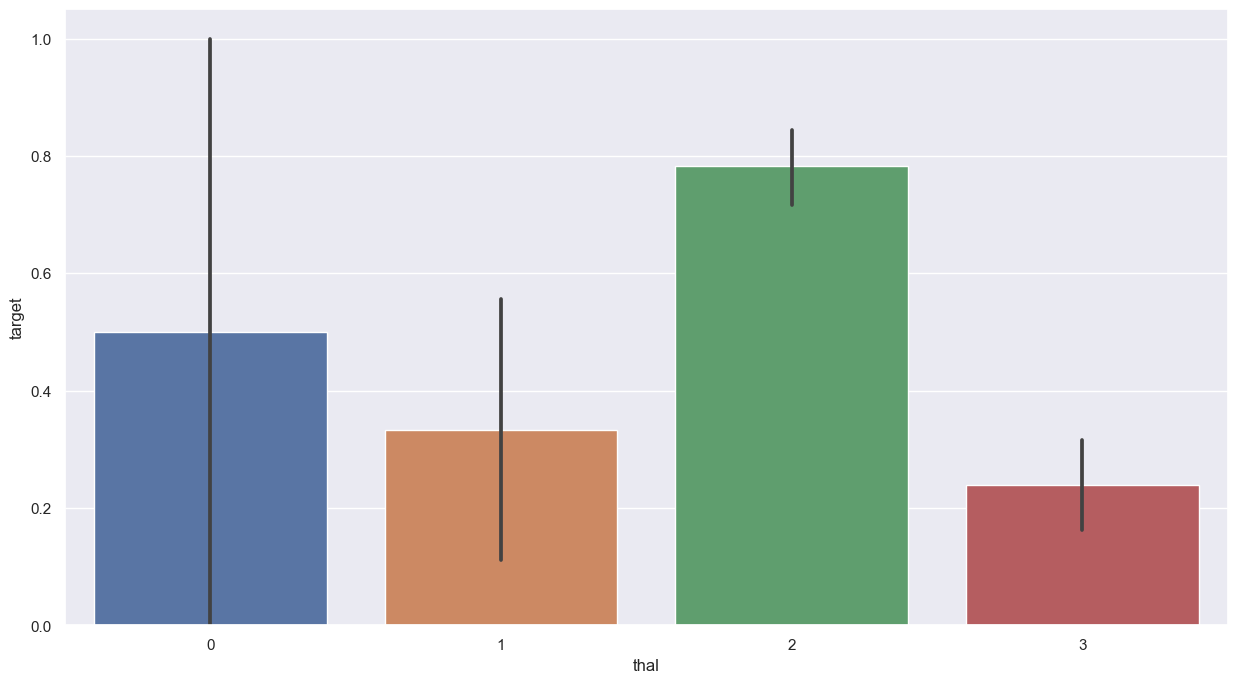

In [95]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

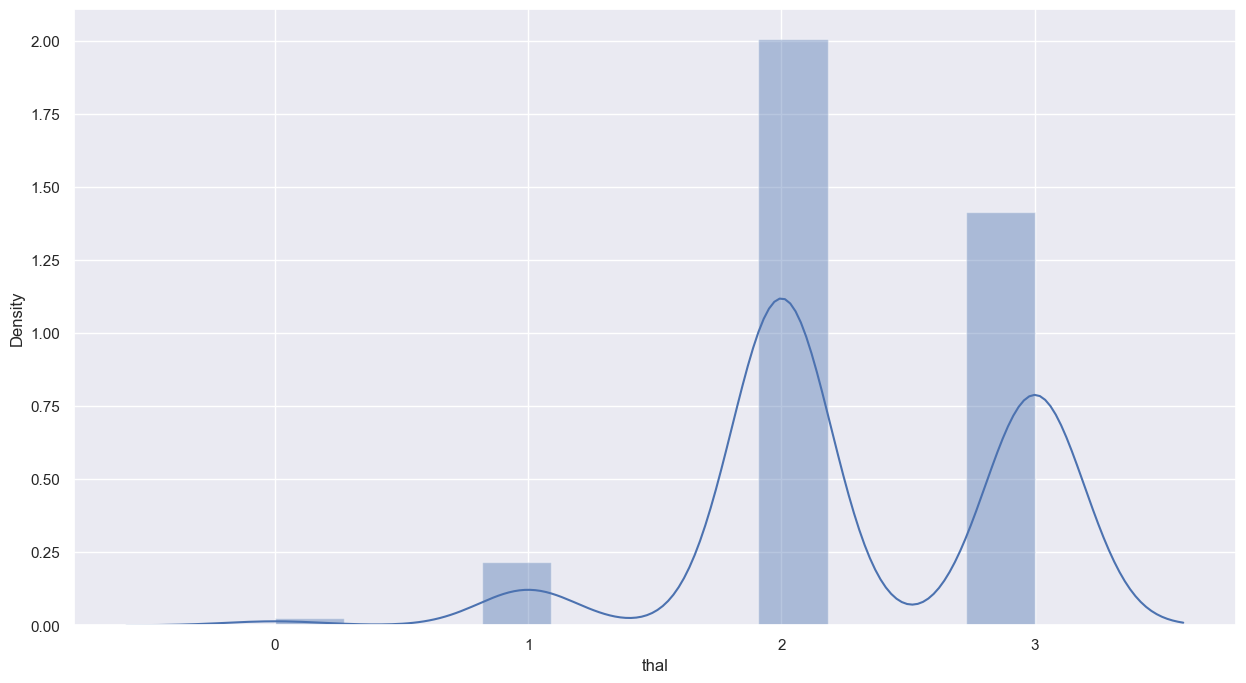

In [96]:
sns.distplot(dataset["thal"])

In [97]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [98]:
X_train.shape

(242, 13)

In [99]:
X_test.shape

(61, 13)

In [100]:
Y_train.shape

(242,)

In [101]:
Y_test.shape

(61,)

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [104]:
Y_pred_lr.shape

(61,)

In [105]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [46]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [47]:
Y_pred_nb.shape

(61,)

In [48]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [49]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [50]:
Y_pred_svm.shape

(61,)

In [51]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [53]:
Y_pred_knn.shape

(61,)

In [54]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [55]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [56]:
print(Y_pred_dt.shape)

(61,)


In [57]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [58]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [60]:
Y_pred_rf.shape

(61,)

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [62]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[22:10:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
Y_pred_xgb.shape

(61,)

In [64]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [65]:
from keras.models import Sequential
from keras.layers import Dense

In [66]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 7ms/step - loss: 54.3530 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 49.1576 - accuracy: 0.5413
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 43.9945 - accuracy: 0.5413
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 38.9783 - accuracy: 0.5413
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 34.0908 - accuracy: 0.5413
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 29.3188 - accuracy: 0.5372
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 24.6417 - accuracy: 0.5207
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 20.1268 - accuracy: 0.5041
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 16.2180 - accuracy: 0.4835
Epoch 10/300
8/8 [==============================] - 0s 5ms/step - loss: 13.7296 - accuracy: 0.3926
Epoch 11/300
8/8 [=

8/8 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.8099
Epoch 85/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8017
Epoch 86/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.8140
Epoch 87/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4403 - accuracy: 0.8140
Epoch 88/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.7934
Epoch 89/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.8182
Epoch 90/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.8264
Epoch 91/300
8/8 [==============================] - 0s 12ms/step - loss: 0.4440 - accuracy: 0.8058
Epoch 92/300
8/8 [==============================] - 0s 7ms/step - loss: 0.4290 - accuracy: 0.8140
Epoch 93/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4350 - accuracy: 0.8058
Epoch 94/300
8/8 [==============

8/8 [==============================] - 0s 5ms/step - loss: 0.3838 - accuracy: 0.8512
Epoch 168/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3827 - accuracy: 0.8471
Epoch 169/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3773 - accuracy: 0.8554
Epoch 170/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8554
Epoch 171/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8512
Epoch 172/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3856 - accuracy: 0.8595
Epoch 173/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3879 - accuracy: 0.8182
Epoch 174/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.8306
Epoch 175/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3801 - accuracy: 0.8471
Epoch 176/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.8388
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 3ms/step - loss: 0.3703 - accuracy: 0.8306
Epoch 250/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8512
Epoch 251/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3595 - accuracy: 0.8636
Epoch 252/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3656 - accuracy: 0.8471
Epoch 253/300
8/8 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8554
Epoch 254/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.8678
Epoch 255/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.8595
Epoch 256/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3633 - accuracy: 0.8471
Epoch 257/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3650 - accuracy: 0.8512
Epoch 258/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3851 - accuracy: 0.8264
Epoch 259/300
8/8 [=====

In [68]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [69]:
Y_pred_nn.shape

(61, 1)

In [70]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [71]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 85.25 %


In [72]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 85.25 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

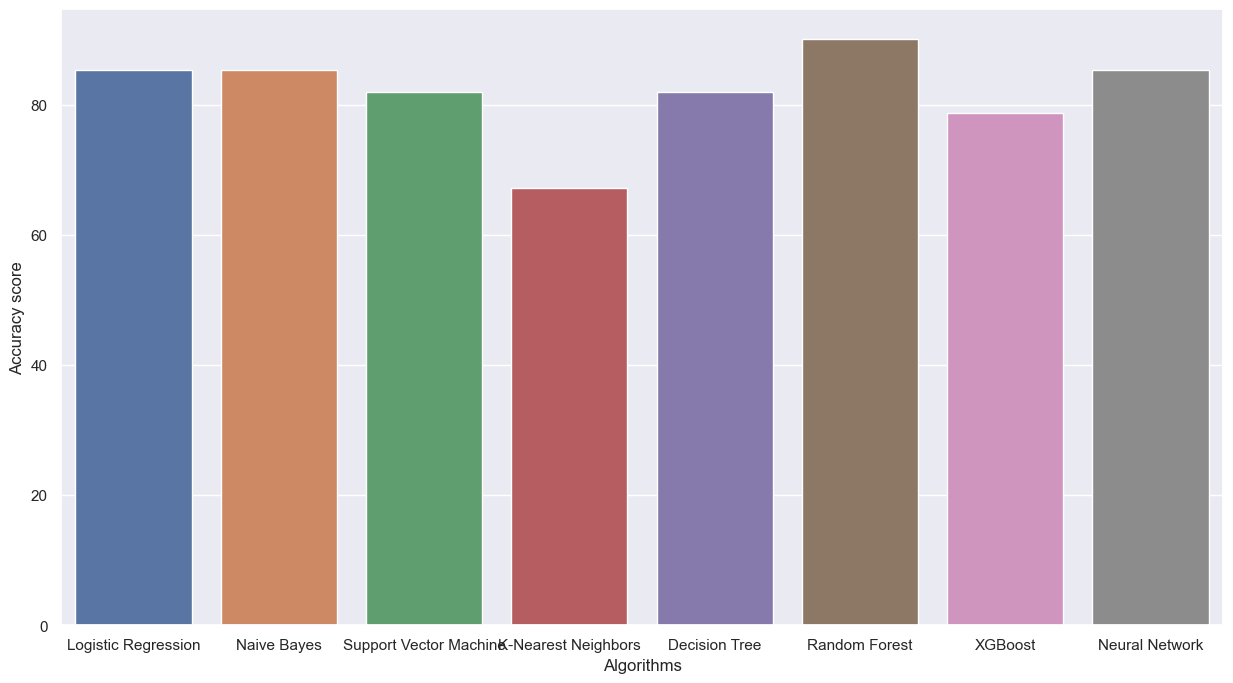

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)